✓ All imports successful!
PyTorch version: 2.8.0
CUDA available: False
Using device: cpu

Hyperparameters:
  Batch size: 128
  Learning rate: 0.001
  Epochs: 10
  Latent dimension: 20

Loading MNIST dataset...
✓ Data loaded successfully!
  Training batches: 469
  Test batches: 79


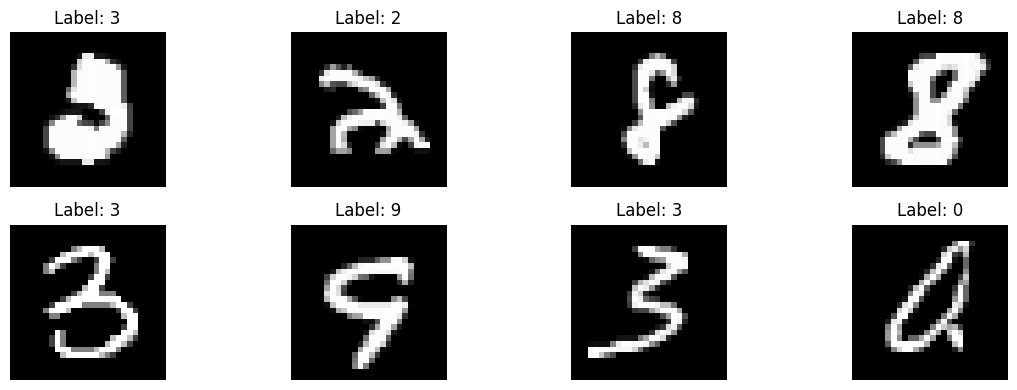

Sample batch shape: torch.Size([128, 1, 28, 28])

Creating VAE model with latent dimension 20...

VAE Architecture:
VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (fc_mu): Linear(in_features=3136, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=3136, out_features=20, bias=True)
  (decoder_input): Linear(in_features=20, out_features=3136, bias=True)
  (decoder): Sequential(
    (0): Unflatten(dim=1, unflattened_size=(64, 7, 7))
    (1): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (2): ReLU()
    (3): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): Sigmoid()
  )
)

Total parameters: 228,905
Trainable parameters: 228,905
✓ Optimizer: Adam
✓ Learning rat

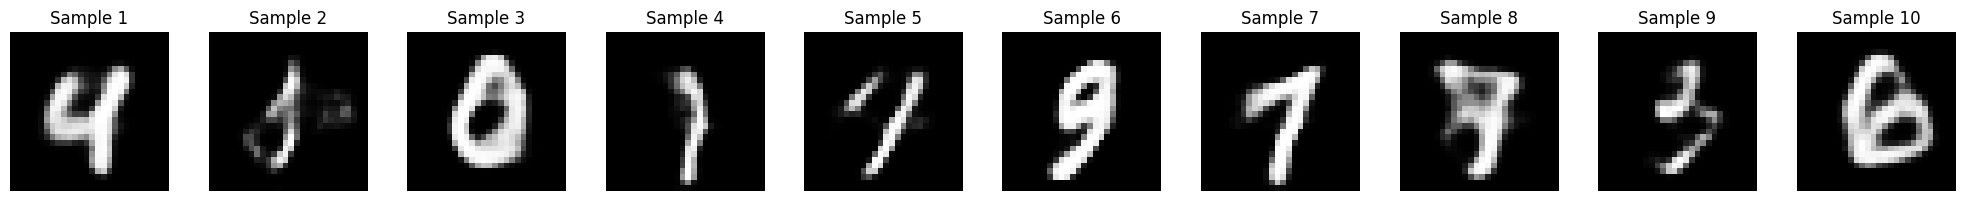


Reconstructing test images...



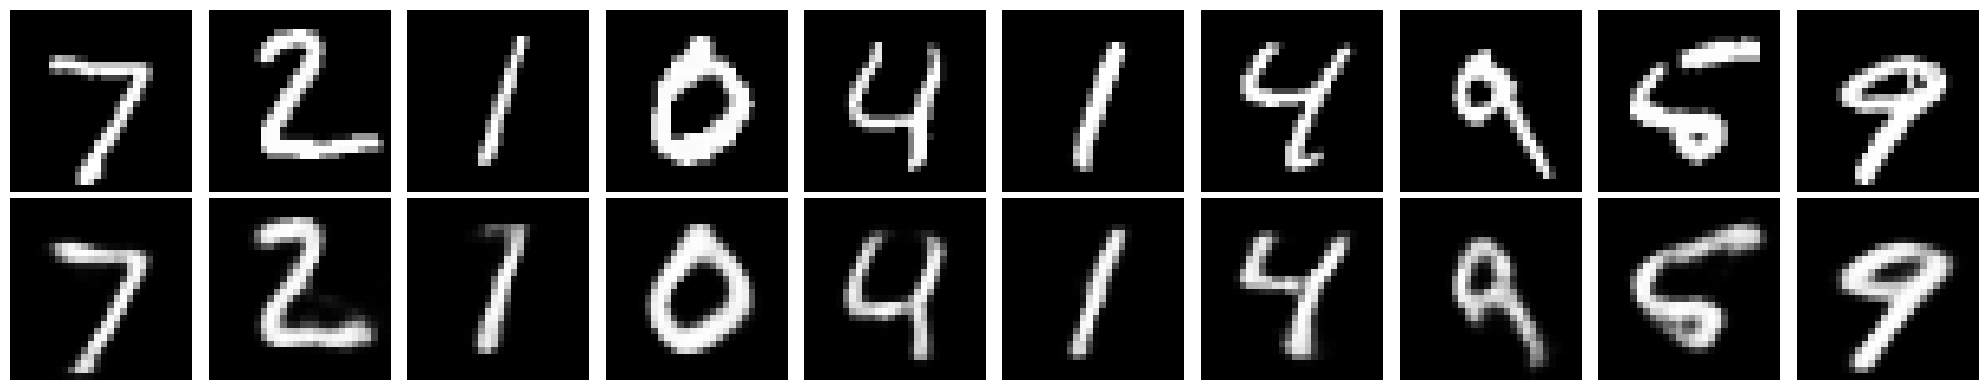


Interpolating between two images in latent space...



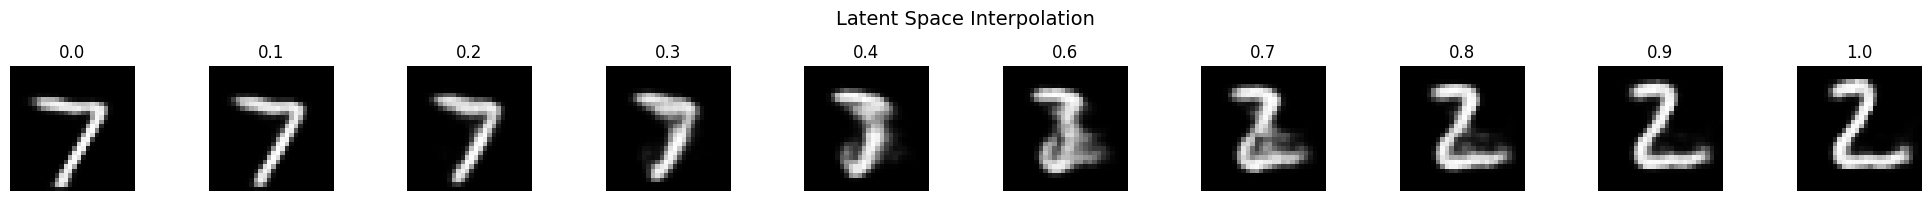


Generating a grid of samples...



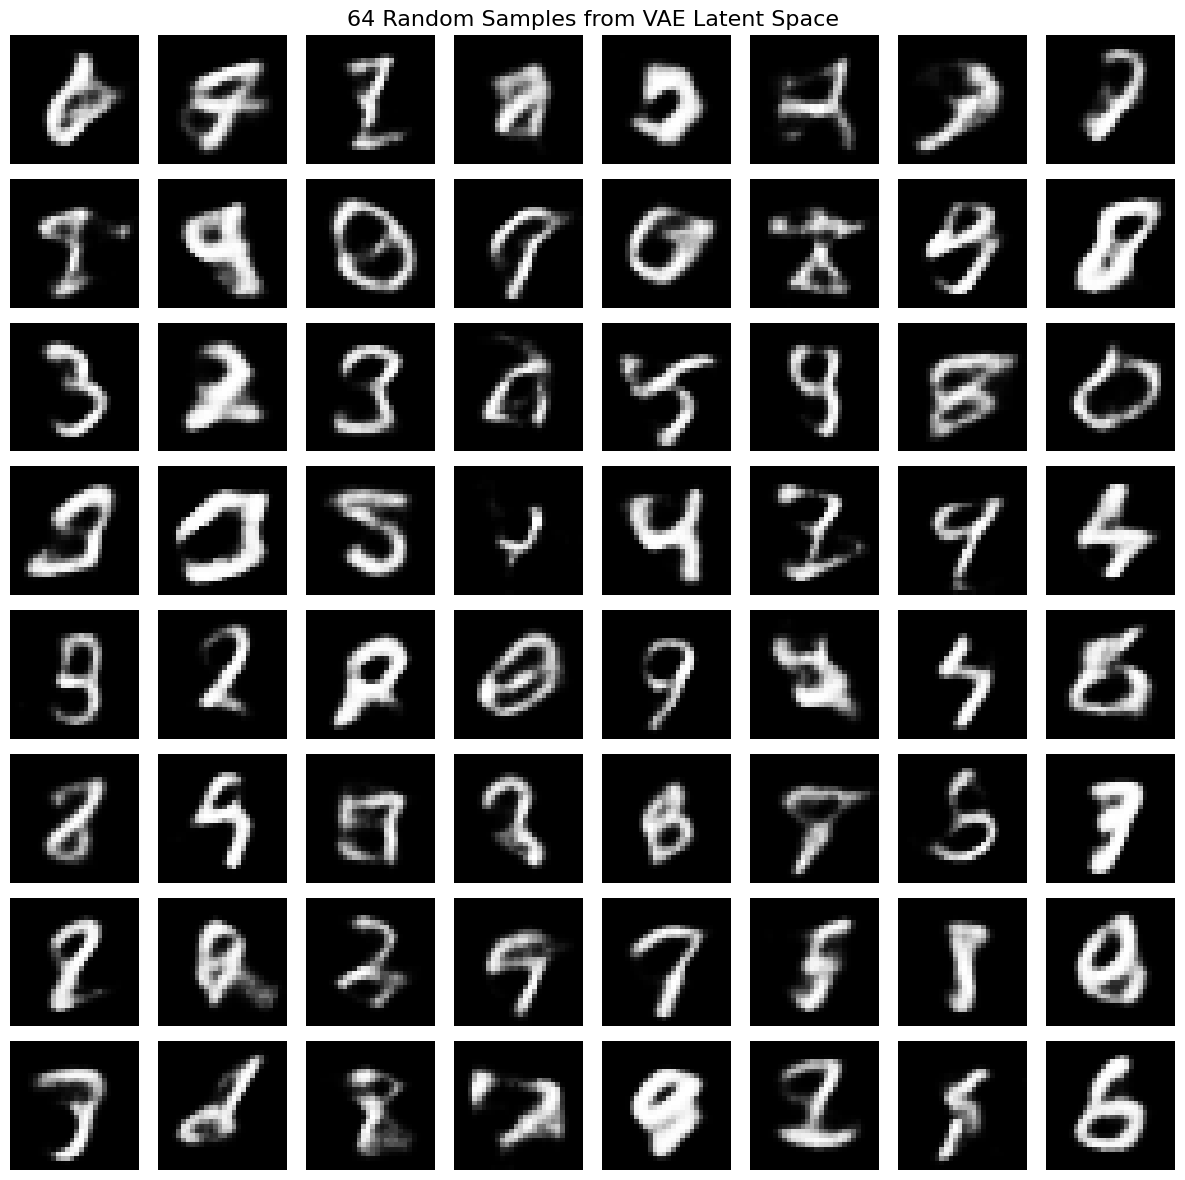


VAE TRAINING SUMMARY
Model: VAE
Dataset: MNIST
Latent Dimension: 20
Epochs: 10
Batch Size: 128
Learning Rate: 0.001
Model saved to: vae_latent20_trained.pth

What VAE learned:
1. Encoder: Maps images to latent space (compressed representation)
2. Decoder: Reconstructs images from latent codes
3. Latent space: Continuous space where similar digits are close together

Applications:
- Generate new digit images
- Compress images to low-dimensional codes
- Interpolate smoothly between different digits
- Anomaly detection

Tips for experimentation:
1. Try different LATENT_DIM values (2, 10, 20, 50)
2. With LATENT_DIM=2, you can visualize the entire latent space
3. Larger latent dimensions give better reconstructions
4. Try more epochs for better quality
5. Experiment with learning rate


In [1]:
# Cell 1: Import libraries
from helper_lib.data_loader import get_data_loader
from helper_lib.trainer import train_vae_model
from helper_lib.model import get_model
from helper_lib.generator import generate_samples, reconstruct_images, interpolate_latent_space
from helper_lib.utils import save_model
import torch
import torch.optim as optim

print("✓ All imports successful!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Cell 2: Set up device and hyperparameters
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Hyperparameters
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
EPOCHS = 10
LATENT_DIM = 20  # Size of latent space

print(f"\nHyperparameters:")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Epochs: {EPOCHS}")
print(f"  Latent dimension: {LATENT_DIM}")

# Cell 3: Load data
print("\nLoading MNIST dataset...")
train_loader = get_data_loader('mnist', batch_size=BATCH_SIZE, train=True, dataset_type='mnist', for_vae=True)
test_loader = get_data_loader('mnist', batch_size=BATCH_SIZE, train=False, dataset_type='mnist', for_vae=True)

print(f"✓ Data loaded successfully!")
print(f"  Training batches: {len(train_loader)}")
print(f"  Test batches: {len(test_loader)}")

# Cell 4: Visualize sample data
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
fig = plt.figure(figsize=(12, 4))
for idx in range(8):
    ax = fig.add_subplot(2, 4, idx+1)
    img = images[idx].squeeze().numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {labels[idx].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Sample batch shape: {images.shape}")

# Cell 5: Create VAE model
print(f"\nCreating VAE model with latent dimension {LATENT_DIM}...")
vae = get_model('VAE', latent_dim=LATENT_DIM, input_channels=1)
vae = vae.to(device)

# Print model architecture
print("\nVAE Architecture:")
print(vae)

# Count parameters
total_params = sum(p.numel() for p in vae.parameters())
trainable_params = sum(p.numel() for p in vae.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Cell 6: Set up optimizer
optimizer = optim.Adam(vae.parameters(), lr=LEARNING_RATE)

print(f"✓ Optimizer: {optimizer.__class__.__name__}")
print(f"✓ Learning rate: {LEARNING_RATE}")

# Cell 7: Train the VAE
print(f"\n{'='*60}")
print(f"Starting VAE training for {EPOCHS} epochs...")
print(f"{'='*60}\n")

trained_vae = train_vae_model(
    model=vae,
    data_loader=train_loader,
    optimizer=optimizer,
    device=device,
    epochs=EPOCHS
)

print(f"\n{'='*60}")
print("Training completed!")
print(f"{'='*60}\n")

# Cell 8: Save the trained model
model_path = f'vae_latent{LATENT_DIM}_trained.pth'
save_model(trained_vae, path=model_path)
print(f"✓ Model saved to {model_path}")

# Cell 9: Generate random samples from latent space
print("\n" + "="*60)
print("Generating random samples from latent space...")
print("="*60 + "\n")

generate_samples(trained_vae, device, num_samples=10, latent_dim=LATENT_DIM)

# Cell 10: Reconstruct test images
print("\n" + "="*60)
print("Reconstructing test images...")
print("="*60 + "\n")

reconstruct_images(trained_vae, test_loader, device, num_images=10)

# Cell 11: Interpolate in latent space
print("\n" + "="*60)
print("Interpolating between two images in latent space...")
print("="*60 + "\n")

interpolate_latent_space(trained_vae, test_loader, device, steps=10)

# Cell 12: Generate a grid of samples
print("\n" + "="*60)
print("Generating a grid of samples...")
print("="*60 + "\n")

# Generate more samples in a grid
trained_vae.eval()
with torch.no_grad():
    z = torch.randn(64, LATENT_DIM).to(device)
    samples = trained_vae.decode(z).cpu()

# Plot in 8x8 grid
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        idx = i * 8 + j
        axes[i, j].imshow(samples[idx].squeeze().numpy(), cmap='gray')
        axes[i, j].axis('off')

plt.suptitle('64 Random Samples from VAE Latent Space', fontsize=16)
plt.tight_layout()
plt.show()

# Cell 13: Summary
print("\n" + "="*60)
print("VAE TRAINING SUMMARY")
print("="*60)
print(f"Model: VAE")
print(f"Dataset: MNIST")
print(f"Latent Dimension: {LATENT_DIM}")
print(f"Epochs: {EPOCHS}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Model saved to: {model_path}")
print("="*60)

print("\nWhat VAE learned:")
print("1. Encoder: Maps images to latent space (compressed representation)")
print("2. Decoder: Reconstructs images from latent codes")
print("3. Latent space: Continuous space where similar digits are close together")
print("\nApplications:")
print("- Generate new digit images")
print("- Compress images to low-dimensional codes")
print("- Interpolate smoothly between different digits")
print("- Anomaly detection")

# Cell 14: Experiment with different latent dimensions (optional)
print("\n" + "="*60)
print("Tips for experimentation:")
print("="*60)
print("1. Try different LATENT_DIM values (2, 10, 20, 50)")
print("2. With LATENT_DIM=2, you can visualize the entire latent space")
print("3. Larger latent dimensions give better reconstructions")
print("4. Try more epochs for better quality")
print("5. Experiment with learning rate")